In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# Loading mapping files
mapping_to_token = pd.read_csv("../csv_files/bookstore_csv/mapping_token.csv")
mapping_to_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_ast.csv")
mapping_to_rel_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_relative_ast.csv")
mapping_to_comp_sort_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_sorted_comp_ast.csv")

mapping = {"token" : mapping_to_token, "ast" : mapping_to_ast, "relative_ast" : mapping_to_rel_ast, "comp_sorted_ast" : mapping_to_comp_sort_ast}

d_type = {"commit_hash" : "str", 	"num_additions" : int,	"num_deletions": int, "filename" : "str"}

# Function for loading data
def load_data(file):
    df = pd.read_csv(file)
    df = df[df.filename.str.endswith(".java")]
    return pd.DataFrame({"commit_hash": df.commit_hash, "changes": pd.to_numeric(df.num_additions) + pd.to_numeric(df.num_deletions)})

# Loading data
data_java = load_data("../csv_files/bookstore_csv/output_java.csv")
data_java_nws = load_data("../csv_files/bookstore_csv/output_nws.csv") 
data_token = load_data("../csv_files/bookstore_csv/output_token.csv")
data_ast = load_data("../csv_files/bookstore_csv/output_ast.csv")
data_comp_sort_ast = load_data("../csv_files/bookstore_csv/output_sort_comp_ast.csv")
data_rel_ast = load_data("../csv_files/bookstore_csv/output_relative_ast.csv")

data = {"java" : data_java, "java_nws" : data_java_nws, "token" : data_token, "ast" : data_ast, "comp_sort_ast" : data_comp_sort_ast,"relative_ast" : data_rel_ast}

In [3]:
# Setting up dataframes
df_java = data_java.groupby('commit_hash').sum()
df_java_nws = data_java_nws.groupby('commit_hash').sum()
df_token = pd.merge(data_token, mapping_to_token, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_token"}).drop(columns=["to", "commit_hash_token"]).groupby('commit_hash').sum()
df_ast = pd.merge(data_ast, mapping_to_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_ast"}).drop(columns=["to", "commit_hash_ast"]).groupby('commit_hash').sum()
df_sort_comp_ast = pd.merge(data_comp_sort_ast, mapping_to_comp_sort_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_comp_ast"}).drop(columns=["to", "commit_hash_comp_ast"]).groupby('commit_hash').sum()
df_rel_ast = pd.merge(data_rel_ast, mapping_to_rel_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_rel_ast"}).drop(columns=["to", "commit_hash_rel_ast"]).groupby('commit_hash').sum()

dfs = {"java" : df_java, "java_nws" : df_java_nws, "token" : df_token, "ast" : df_ast, "sort_comp_ast" : df_sort_comp_ast, "relative_ast" : df_rel_ast}

In [4]:
def mergeall(**dfs):
    items = dfs.items()
    table = df_java.rename(columns = dict(changes="repo"))
    for key, df in items:
        table = pd.merge(table, df.rename(columns = dict(changes=key)), left_index=True, right_index=True, validate="1:1", how="outer")
    return table

df_merged = mergeall(token = df_token, ast = df_ast, sorted_comp_ast = df_sort_comp_ast, relative_ast = df_rel_ast, nws = df_java_nws).fillna(0, downcast="int64")

df_merged.isna().sum()
df_merged

,repo,token,ast,sorted_comp_ast,relative_ast,nws
commit_hash,,,,,,
011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,110,153,1294,229,282,98
01db061505662ad6da55e360e76c791caca17d45,6,12,103,32,29,4
05de44d435b198e643a2f84928c3ffa473e9fa91,11,37,368,69,84,11
0c688cf10cba27a4b603fe51257ce80cc9cb8589,2,2,2,20,2,2
0edb59e4c6051ca2b68f2d4f1321bb11bc849979,10,40,57,33,57,10
13eb10f8a021cadb7df14c1847d66c84c14c6ae2,4,4,4,42,4,4
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7,574,580,7414,889,1196,560
2c09462e3198843acecb1be04007ca7ad256ef64,12,12,12,80,12,12
45edd52796dc2025b46c9592678dc9be5f2b4178,225,338,3219,955,451,225


<function matplotlib.pyplot.show(close=None, block=None)>

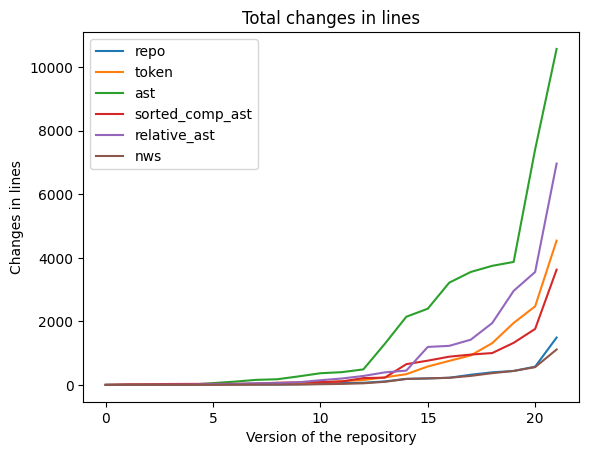

In [5]:
df = pd.DataFrame({k : np.array(df_merged[k].sort_values()) for k in df_merged.columns})
df.plot()
plt.xlabel("Version of the repository")
plt.ylabel("Changes in lines")
plt.title("Total changes in lines")
plt.show

In [6]:
len(df)

22

<Axes: >

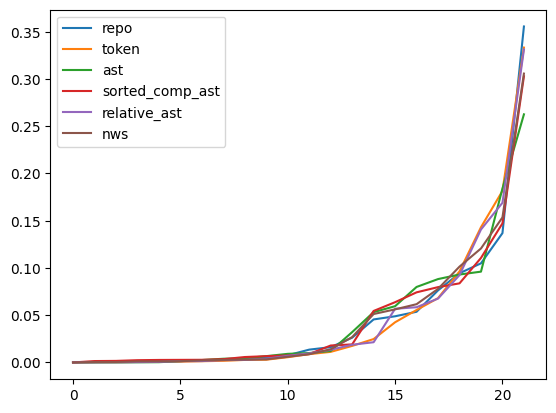

In [7]:
(df / df.sum()).plot()

<Axes: >

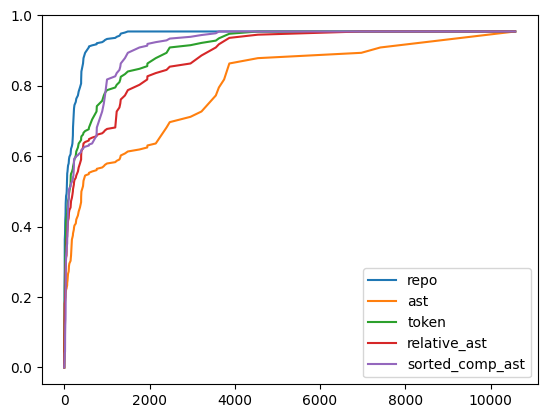

In [8]:
# 1.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "ast", "token", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/len(df.index)}, index = df[key])
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot()

<Axes: >

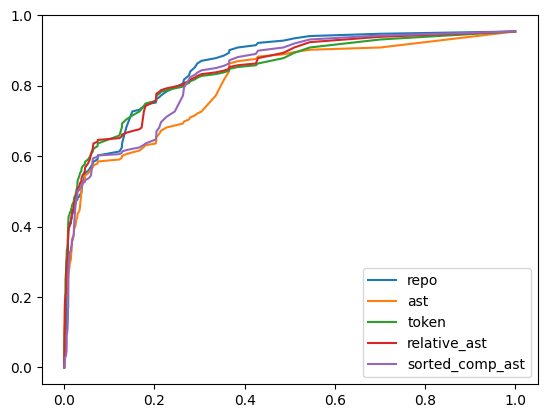

In [9]:
# 2.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "ast", "token", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/len(df.index)}, index = df[key] / max(df[key]))
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot()

<Axes: xlabel='repo'>

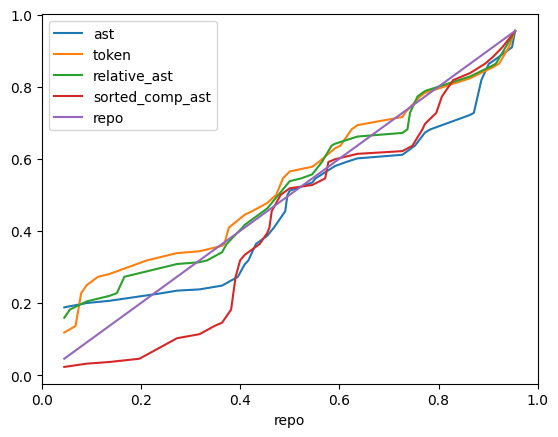

In [10]:
# 3.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "ast", "token", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/len(df.index)}, index = df[key] / max(df[key]))
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() 

p_p = cdf_rel.set_index("repo").assign(repo = cdf_rel.repo.values)
p_p.plot()

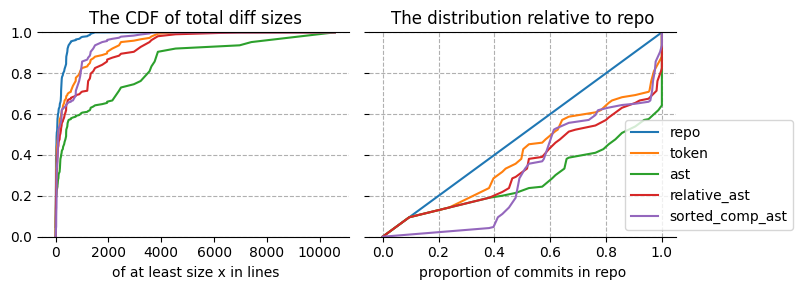

In [11]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(7,3))
axes = axes.flatten()
args = {"legend" : False, "ylim" : (0,1)}

# 1.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/(len(df.index)-1)}, index = df[key])
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_tot = pd.DataFrame(data = data).interpolate() 
cdf_tot.plot(ax=axes[0], title="The CDF of total diff sizes", xlabel="of at least size x in lines", **args)
cdf_tot.repo = cdf_tot.repo.fillna(0)
p_p = cdf_tot.set_index("repo").assign(repo = cdf_tot.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")


handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15,0.4))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

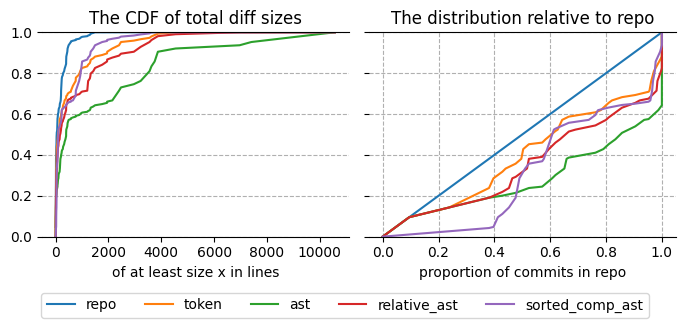

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(7, 3))
axes = axes.flatten()
args = {"legend": False, "ylim": (0, 1)}

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data={key: df.index / (len(df.index) - 1)}, index=df[key])
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]

cdf_tot = pd.DataFrame(data=data).interpolate()
cdf_tot.plot(ax=axes[0], title="The CDF of total diff sizes", xlabel="of at least size x in lines", **args)
cdf_tot.repo = cdf_tot.repo.fillna(0)
p_p = cdf_tot.set_index("repo").assign(repo=cdf_tot.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.show()

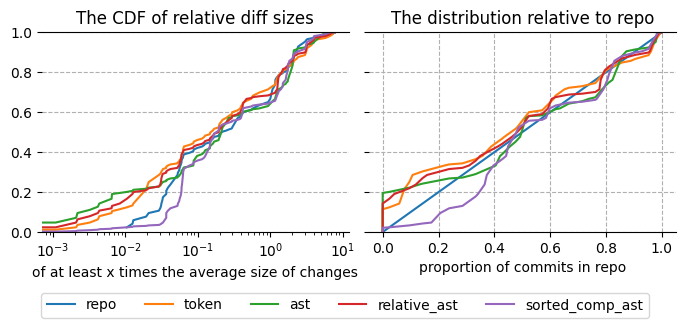

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(7, 3))
axes = axes.flatten()
args = {"legend": False, "ylim": (0, 1)}

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

# -----
# 2.	2.	The distribution of relative diff changes. It should read: the chance of getting 
# a commit that contributes at least "x" percent of the total repository is "y".  
# https://en.wikipedia.org/wiki/Cumulative_distribution_function
data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/(len(df.index)-1)}, index = df[key] / df[key].mean())
    df_x = df_x.groupby(df_x.index).mean()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot(ax=axes[0],title="The CDF of relative diff sizes", xlabel="of at least x times the average size of changes", **args)
axes[0].xaxis.set_major_formatter(lambda y,z: f"{y*100:0.0f}%")
axes[0].set_xscale('log')

# 3.	3.	The relative distribution of relative diff changes compared with the original distribution. 
# I think we can calculate this by doing where Fast(Foriginal-1(r)).  
#  https://blogs.iq.harvard.edu/relative_distri
cdf_rel.repo = cdf_rel.repo.fillna(0)
p_p = cdf_rel.set_index("repo").assign(repo = cdf_rel.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")
# -----
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.show()

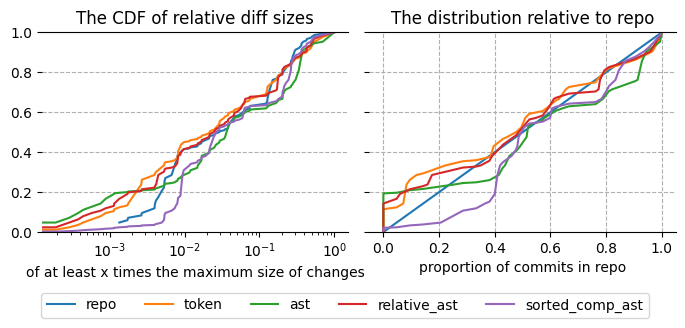

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(7, 3))
axes = axes.flatten()
args = {"legend": False, "ylim": (0, 1)}

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

# 2.	2.	The distribution of relative diff changes. It should read: the chance of getting 
# a commit that contributes at least "x" percent of the total repository is "y".  
# https://en.wikipedia.org/wiki/Cumulative_distribution_function
data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/(len(df.index)-1)}, index = df[key] / max(df[key]))
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot(ax=axes[0],title="The CDF of relative diff sizes", xlabel="of at least x times the maximum size of changes", **args)
axes[0].xaxis.set_major_formatter(lambda y,z: f"{y*100:0.0f}%")
axes[0].set_xscale('log')

# 3.	3.	The relative distribution of relative diff changes compared with the original distribution. 
# I think we can calculate this by doing where Fast(Foriginal-1(r)).  
#  https://blogs.iq.harvard.edu/relative_distri
cdf_rel.repo = cdf_rel.repo.fillna(0)
p_p = cdf_rel.set_index("repo").assign(repo = cdf_rel.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.show()

In [15]:
df

,repo,token,ast,sorted_comp_ast,relative_ast,nws
0,2,0,0,0,0,0
1,2,2,2,18,2,2
2,4,4,4,20,4,2
3,6,8,8,29,8,4
4,7,12,12,32,12,4
5,8,12,57,33,29,5
6,10,18,103,34,31,8
7,11,24,159,42,53,10
8,12,37,179,69,57,11
9,22,40,270,80,84,12


<Axes: >

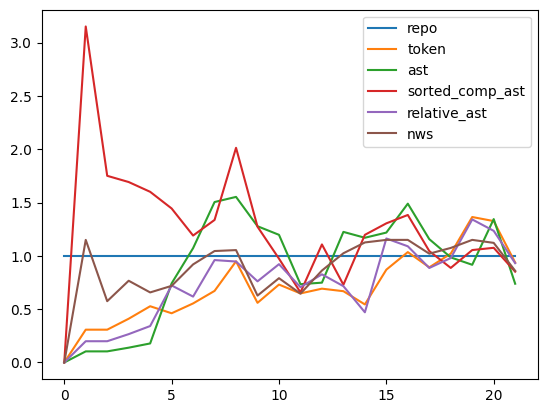

In [16]:
m = df.sum()
dt = df/m
dt.div(dt.repo, axis=0).plot()

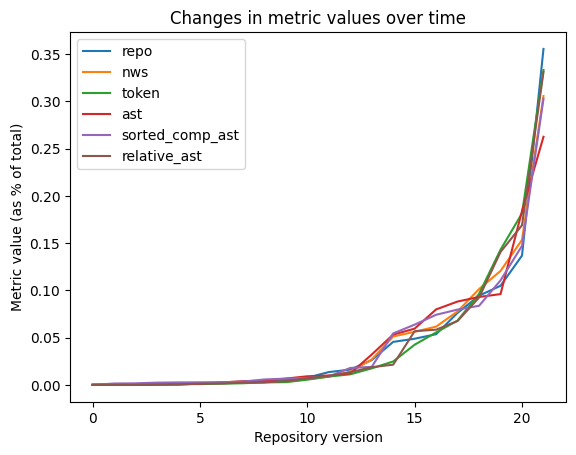

In [17]:
import matplotlib.pyplot as plt

(df[['repo','nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']] / df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']].sum()).plot(kind='line')
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Changes in metric values over time')
plt.show()


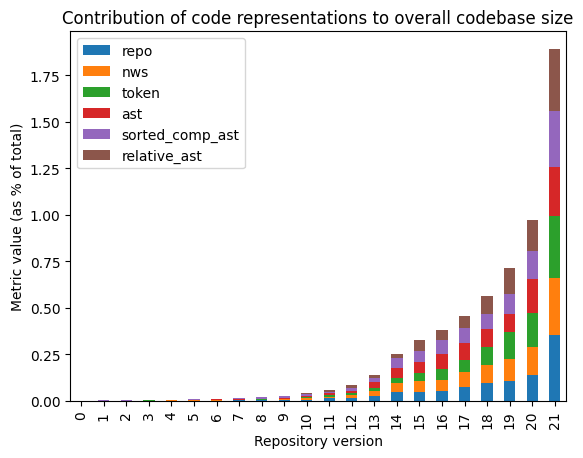

In [18]:
import matplotlib.pyplot as plt

(df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']] / df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']].sum()).plot(kind='bar', stacked=True)
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Contribution of code representations to overall codebase size')
plt.show()


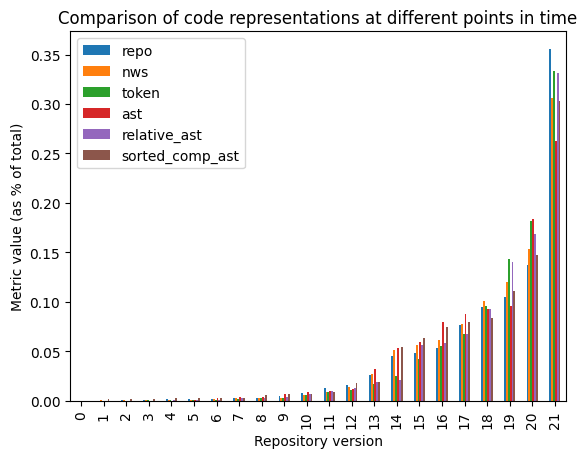

In [19]:
import matplotlib.pyplot as plt

(df[['repo', 'nws', 'token', 'ast', 'relative_ast', 'sorted_comp_ast']] / df[['repo', 'nws', 'token', 'ast', 'relative_ast', 'sorted_comp_ast']].sum()).plot(kind='bar')
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Comparison of code representations at different points in time')
plt.show()


Text(0.5, 1.0, 'Contribution of each commit (cumulative) to all commits')

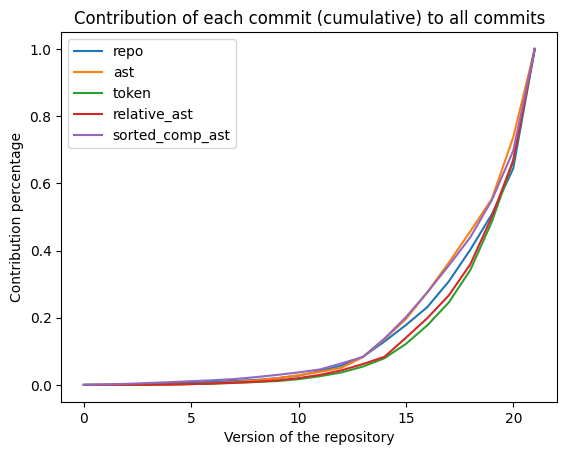

In [20]:
(df[['repo', 'ast', 'token', 'relative_ast', 'sorted_comp_ast']].cumsum() / df[['repo', 'ast', 'token', 'relative_ast', 'sorted_comp_ast']].sum()).plot()
plt.xlabel('Version of the repository')
plt.ylabel('Contribution percentage')
plt.title('Contribution of each commit (cumulative) to all commits')

<Axes: >

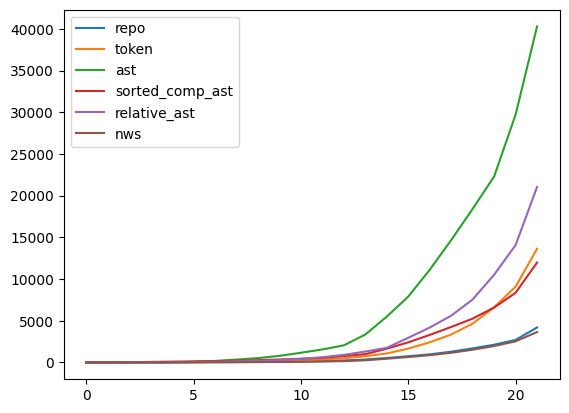

In [21]:
df.cumsum().plot()

In [22]:
#find størrelsen af filen for at finde en relativ ændring 
df_merged[df_merged.repo != 0][df_merged.nws == 0]

,repo,token,ast,sorted_comp_ast,relative_ast,nws
commit_hash,,,,,,
cae53570875b772b7377f0645063fd1b99586994,68,0,0,0,0,0


In [23]:
df_merged / df_merged.sum()

,repo,token,ast,sorted_comp_ast,relative_ast,nws
commit_hash,,,,,,
011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,0.026234,0.011226,0.032127,0.019122,0.013405,0.026871
01db061505662ad6da55e360e76c791caca17d45,0.001431,0.000880,0.002557,0.002672,0.001379,0.001097
05de44d435b198e643a2f84928c3ffa473e9fa91,0.002623,0.002715,0.009137,0.005762,0.003993,0.003016
0c688cf10cba27a4b603fe51257ce80cc9cb8589,0.000477,0.000147,0.000050,0.001670,0.000095,0.000548
0edb59e4c6051ca2b68f2d4f1321bb11bc849979,0.002385,0.002935,0.001415,0.002756,0.002710,0.002742
13eb10f8a021cadb7df14c1847d66c84c14c6ae2,0.000954,0.000293,0.000099,0.003507,0.000190,0.001097
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7,0.136895,0.042556,0.184071,0.074232,0.056852,0.153551
2c09462e3198843acecb1be04007ca7ad256ef64,0.002862,0.000880,0.000298,0.006680,0.000570,0.003290
45edd52796dc2025b46c9592678dc9be5f2b4178,0.053661,0.024800,0.079920,0.079743,0.021438,0.061695
